# RAIN PREDICTION

 Predict next-day rain by training classification models on the target variable RainTomorrow.

## 1. Importing Libraries

In [1]:
# For data analysis
import pandas as pd

# For mathematical operations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling warnings
import warnings
warnings.simplefilter("ignore")

## 2. Loading the dataset

In [2]:
# Reading and storing Dataset 
df = pd.read_csv(r"C:\Users\PC Xpertz\Downloads\archive\weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 3. Exploratory Data Analysis (EDA)

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# Convert datatype of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Simple statistics like count, mean, min, max, etc is calculated for attributes having numeric datatype. Some of the conclusions drawn from the above table are:

1. The average minimum temperature is 12.194 and average maximum temperature is 23.221 degree Celsius.
2. The mean rainfall is 2.36 mm.
3. The average sunshine received is 7.61 hour.
4. The average wind gust speed is 40.035 km/hr.
5. The minimum temperature recorded is -8.5 degree Celsius and the maximum recorded temperature is 48.1 degree Celsius.
6. The minimum rainfall recorded for a particular day is 0 mm and maximum is 371 mm.
7. The median evaporation is 4.8 mm.

In [8]:
# Mapping Yes:1, No:0
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [9]:
df.describe(include="object")

,Location,WindGustDir,WindDir9am,WindDir3pm
count,145460,135134,134894,141232
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3436,9915,11758,10838


In [10]:
# Check for duplicates
duplicate = df[df.duplicated()]
duplicate

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


### No duplicate records are present.

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Observations:-

1. Maximum null values are present in Sunshine column followed by Evaporation.
2. More than 55,000 null values are present in Cloud9am and Cloud3pm columns.
3. Around 15,000 null values are present in Pressure9am and Pressure3pm columns.
4. More than 10,000 null values are present in WindGustDir, WindGustSpeed and WindDir9am columns
5. There are many columns having more than 1000 null records.

In [12]:
# Drop Sunshine, Evaporation, Cloud9am and Cloud3pm as most of the values are null
col = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
df.drop(col, axis=1, inplace=True)

## 4. Label Encoding

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindGustDir'] = le.fit_transform(df['RainTomorrow'])
df['WindGustDir'] = le.fit_transform(df['RainToday'])

In [14]:
# Replace numerical columns with median
def replace_numerical(df):
    for col in df.select_dtypes(['int', 'float']):
        df[col] = df[col].fillna(df[col].median())
    return df

# Replace object columns with mode
def replace_object(df):
    for col in df.select_dtypes('object'):
        df[col] = df[col].fillna(method='ffill')
    return df

In [15]:
df = replace_numerical(df)
df = replace_object(df)

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Hence, all null records are removed from the dataset.

In [17]:
# Plot Corrrelation Matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.00,-0.01,-0.02,-0.00,0.01,0.07,-0.02,-0.01,0.08,0.06,-0.00,0.01,0.04,0.05,-0.02,-0.02,-0.01,-0.01
MinTemp,-0.01,1.00,0.73,0.10,0.05,0.17,-0.12,-0.16,0.17,0.17,-0.23,0.01,-0.42,-0.43,0.90,0.70,0.05,0.08
MaxTemp,-0.02,0.73,1.00,-0.07,-0.20,0.07,-0.25,-0.19,0.01,0.05,-0.50,-0.50,-0.31,-0.40,0.88,0.97,-0.23,-0.16
Rainfall,-0.00,0.10,-0.07,1.00,0.40,0.13,0.06,0.05,0.08,0.06,0.22,0.25,-0.16,-0.12,0.01,-0.08,0.50,0.23
WindGustDir,0.01,0.05,-0.20,0.40,1.00,0.14,0.14,0.12,0.10,0.08,0.30,0.32,-0.15,-0.08,-0.08,-0.20,0.80,0.26
WindGustSpeed,0.07,0.17,0.07,0.13,0.14,1.00,-0.05,0.12,0.58,0.66,-0.21,-0.03,-0.43,-0.38,0.15,0.03,0.15,0.22
WindDir9am,-0.02,-0.12,-0.25,0.06,0.14,-0.05,1.00,0.30,-0.15,-0.02,0.20,0.16,0.03,0.10,-0.20,-0.25,0.13,0.02
WindDir3pm,-0.01,-0.16,-0.19,0.05,0.12,0.12,0.30,1.00,0.03,0.06,0.04,0.00,-0.12,-0.03,-0.18,-0.19,0.12,0.03
WindSpeed9am,0.08,0.17,0.01,0.08,0.10,0.58,-0.15,0.03,1.00,0.51,-0.27,-0.03,-0.22,-0.17,0.13,0.00,0.10,0.09
WindSpeed3pm,0.06,0.17,0.05,0.06,0.08,0.66,-0.02,0.06,0.51,1.00,-0.14,0.02,-0.28,-0.24,0.16,0.03,0.08,0.08


## Observation:-

1. MaxTemp and Temp3pm have a strong positive correlation of 0.97.
2. Pressure9am and Pressure3pm have a strong positive correlation of 0.96.
3. MinTemp and Temp9am have a strong positive correlation of 0.90.
4. MaxTemp and Temp9am have a strong positive correlation of 0.88.
5. Temp9am and Temp3pm have a strong positive correlation of 0.85.
6. Humidity and Temperature attributes have a negative correlation of 0.50

In [18]:
data = df
df.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir               int64
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
dtype: object

## 5. Data Visualization

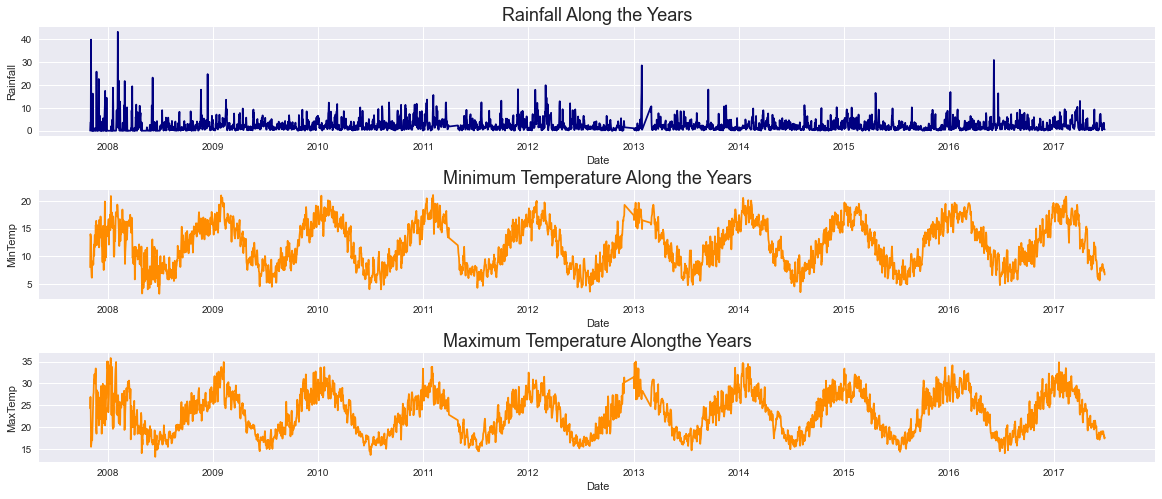

In [19]:
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(20,8)) 

sns.lineplot(data=data, x = 'Date', y = "Rainfall", ci=None, ax=ax[0], color="navy")
ax[0].set_title("Rainfall Along the Years", fontsize=18)

sns.lineplot(data=data, x = 'Date', y = "MinTemp", ci=None, ax=ax[1], color="darkorange")
ax[1].set_title("Minimum Temperature Along the Years", fontsize=18)

sns.lineplot(data=data, x = 'Date', y = "MaxTemp", ci=None, ax=ax[2], color="darkorange")
ax[2].set_title("Maximum Temperature Alongthe Years", fontsize=18)

plt.subplots_adjust(hspace = 0.5)

plt.show()

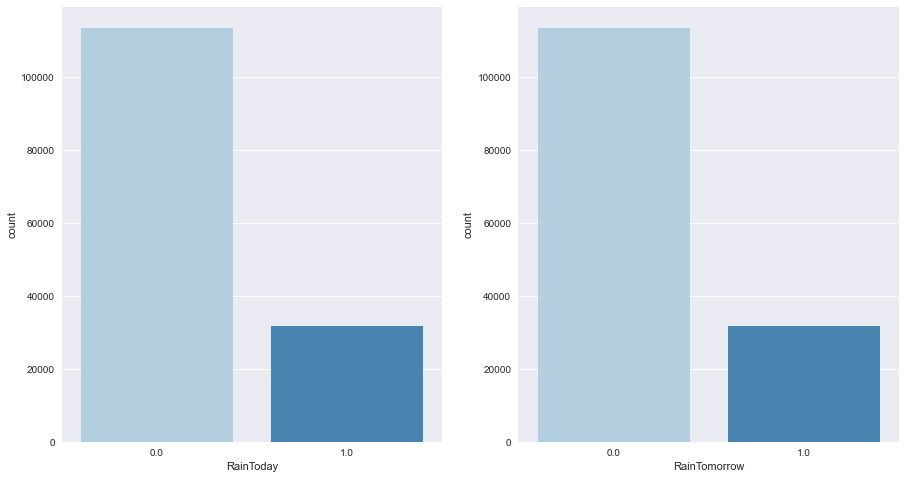

In [20]:
plt.style.use("seaborn")
fig, ax =plt.subplots(1,2, figsize=(15,8))
sns.countplot(df["RainToday"], ax=ax[0], palette="Blues");
sns.countplot(df["RainTomorrow"], ax=ax[1], palette="Blues");

Text(0.5, 0, 'WindDir3pm')

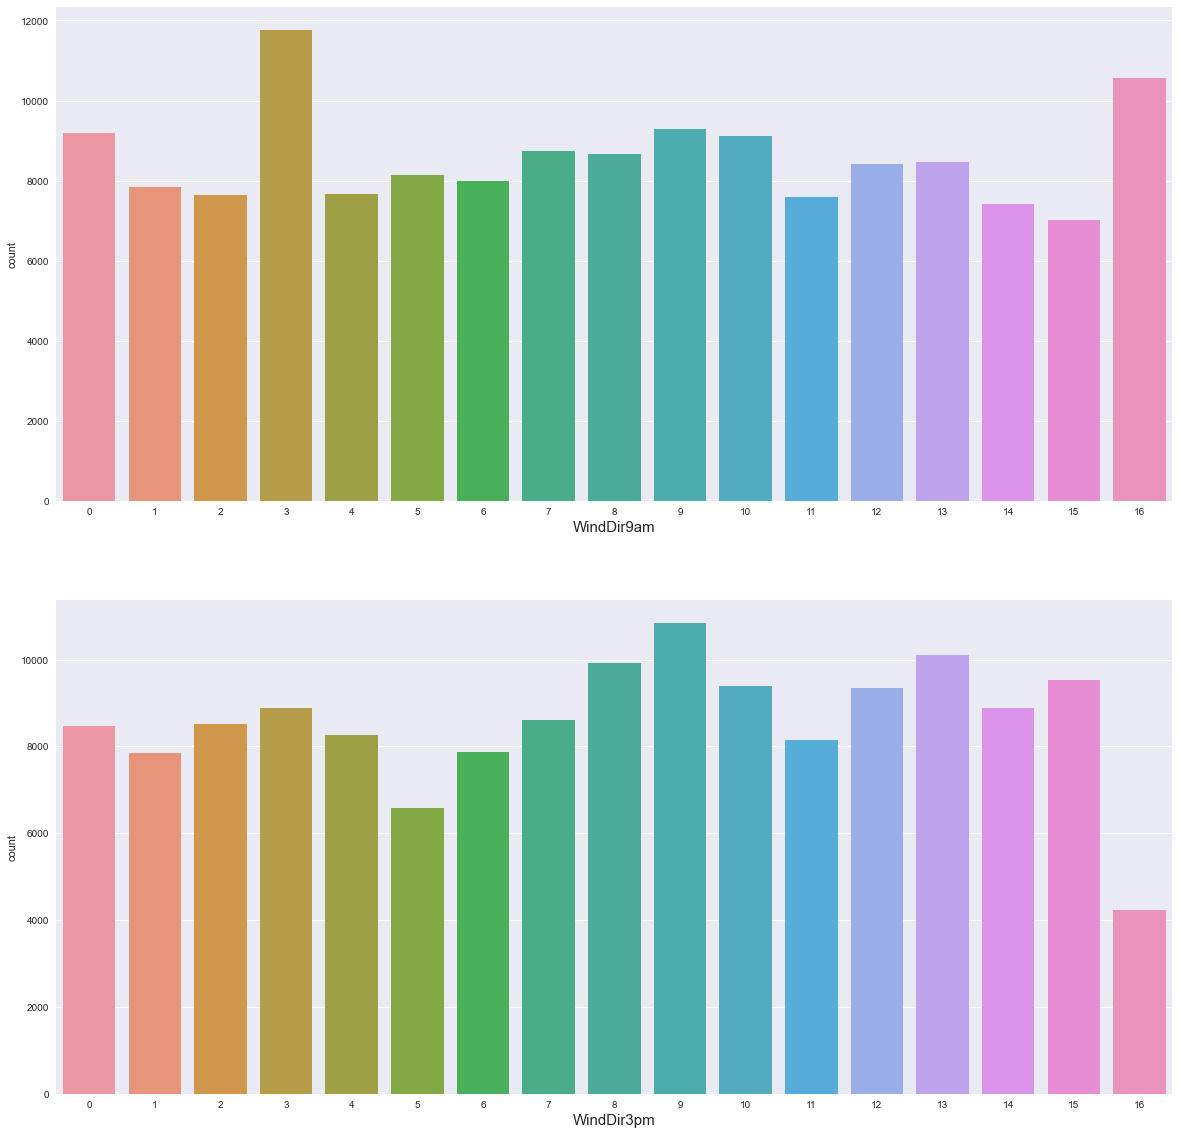

In [21]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.countplot(df['WindDir9am'], ax=ax[0])
ax[0].set_xlabel("WindDir9am",fontsize=15)

sns.countplot(df['WindDir3pm'], ax=ax[1])
ax[1].set_xlabel("WindDir3pm",fontsize=15)


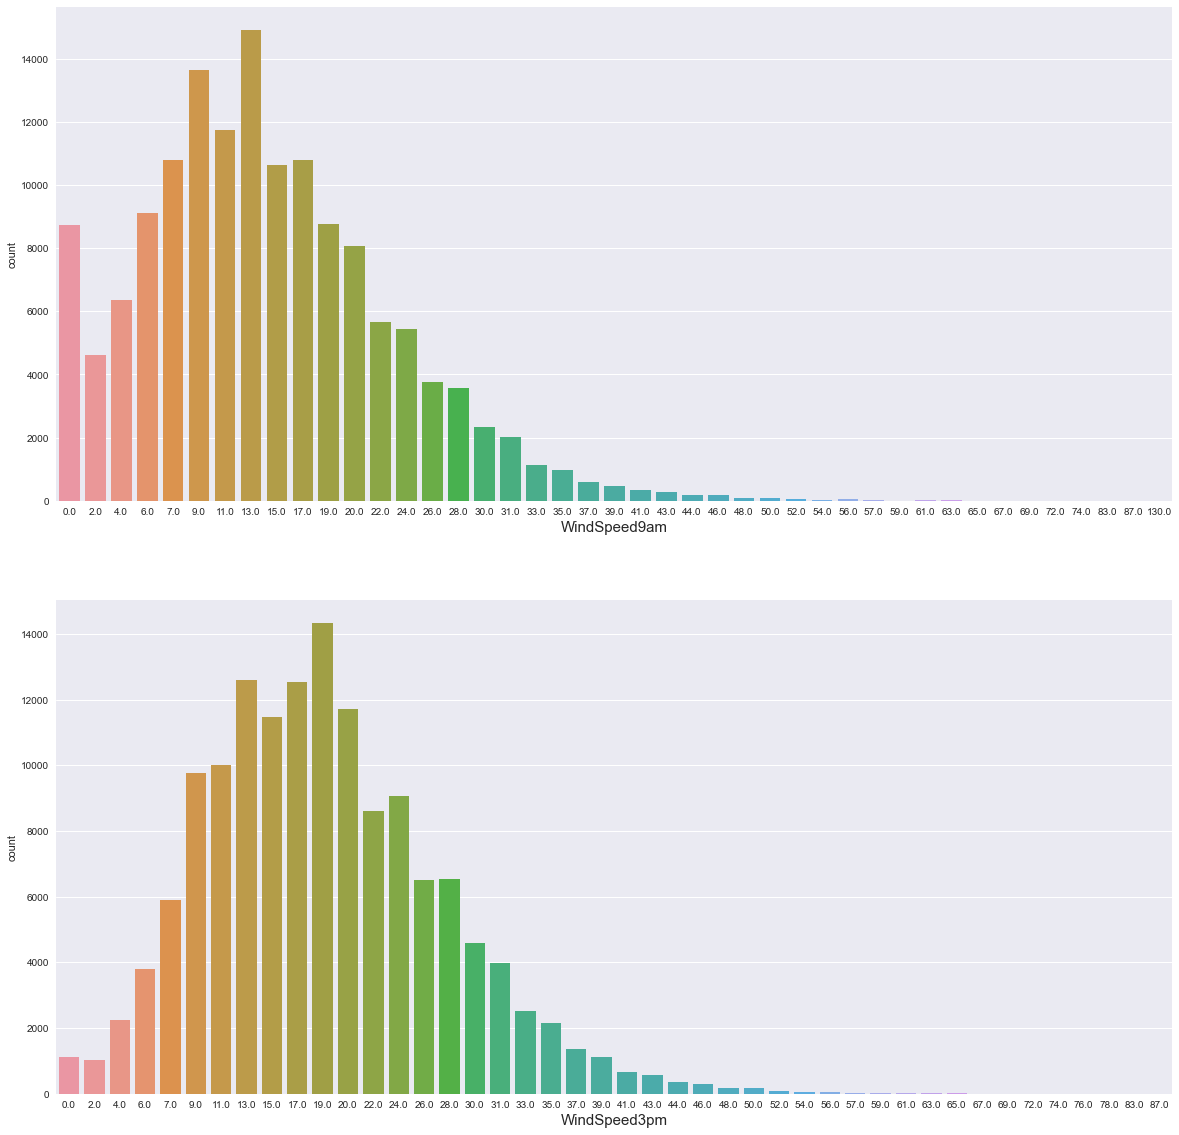

In [22]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.countplot(df['WindSpeed9am'], ax=ax[0])
ax[0].set_xlabel("WindSpeed9am",fontsize=15)

sns.countplot(df['WindSpeed3pm'], ax=ax[1])
ax[1].set_xlabel("WindSpeed3pm",fontsize=15);

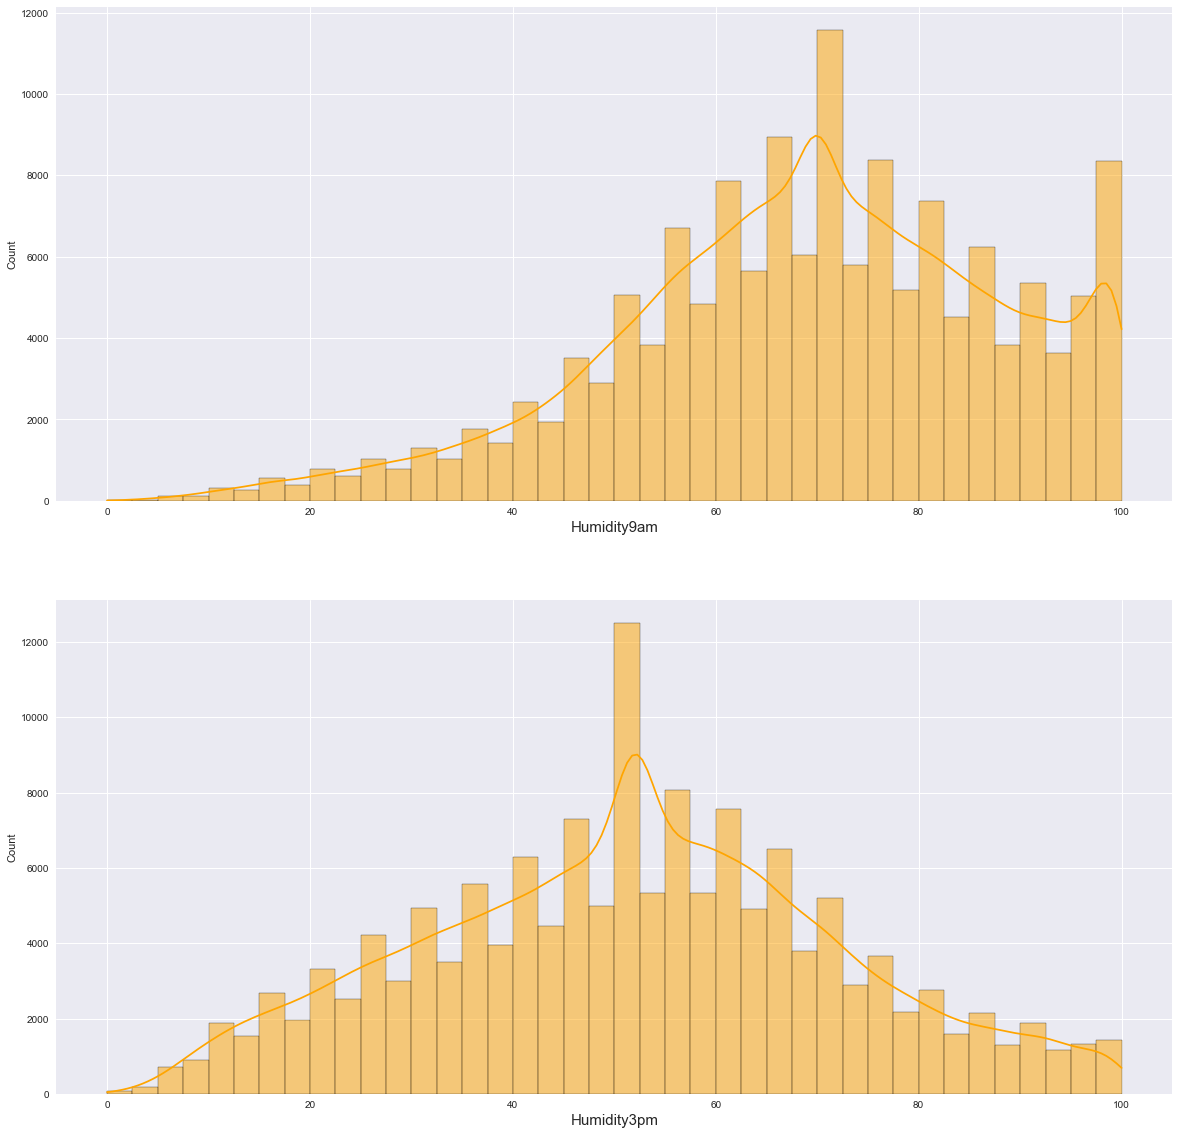

In [23]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.histplot(df['Humidity9am'], ax=ax[0], color="orange", bins=40, kde=True)
ax[0].set_xlabel("Humidity9am",fontsize=15)

sns.histplot(df['Humidity3pm'], ax=ax[1], color="orange", bins=40, kde=True);
ax[1].set_xlabel("Humidity3pm",fontsize=15);

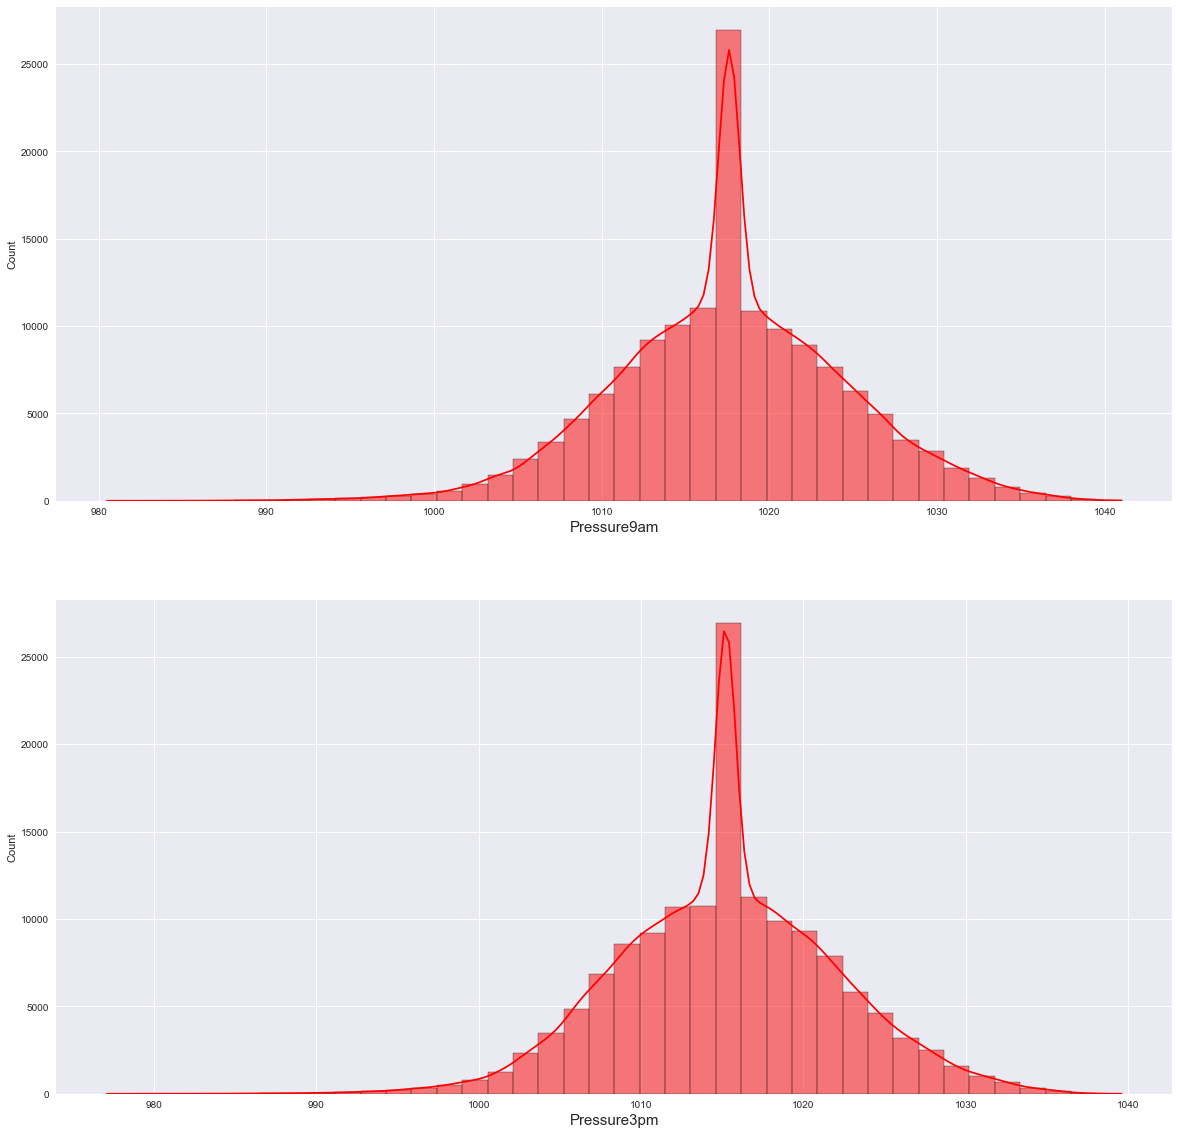

In [24]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.histplot(df['Pressure9am'], ax=ax[0], color="r", bins=40, kde=True)
ax[0].set_xlabel("Pressure9am",fontsize=15)

sns.histplot(df['Pressure3pm'], ax=ax[1], color="r", bins=40, kde=True)
ax[1].set_xlabel("Pressure3pm",fontsize=15);

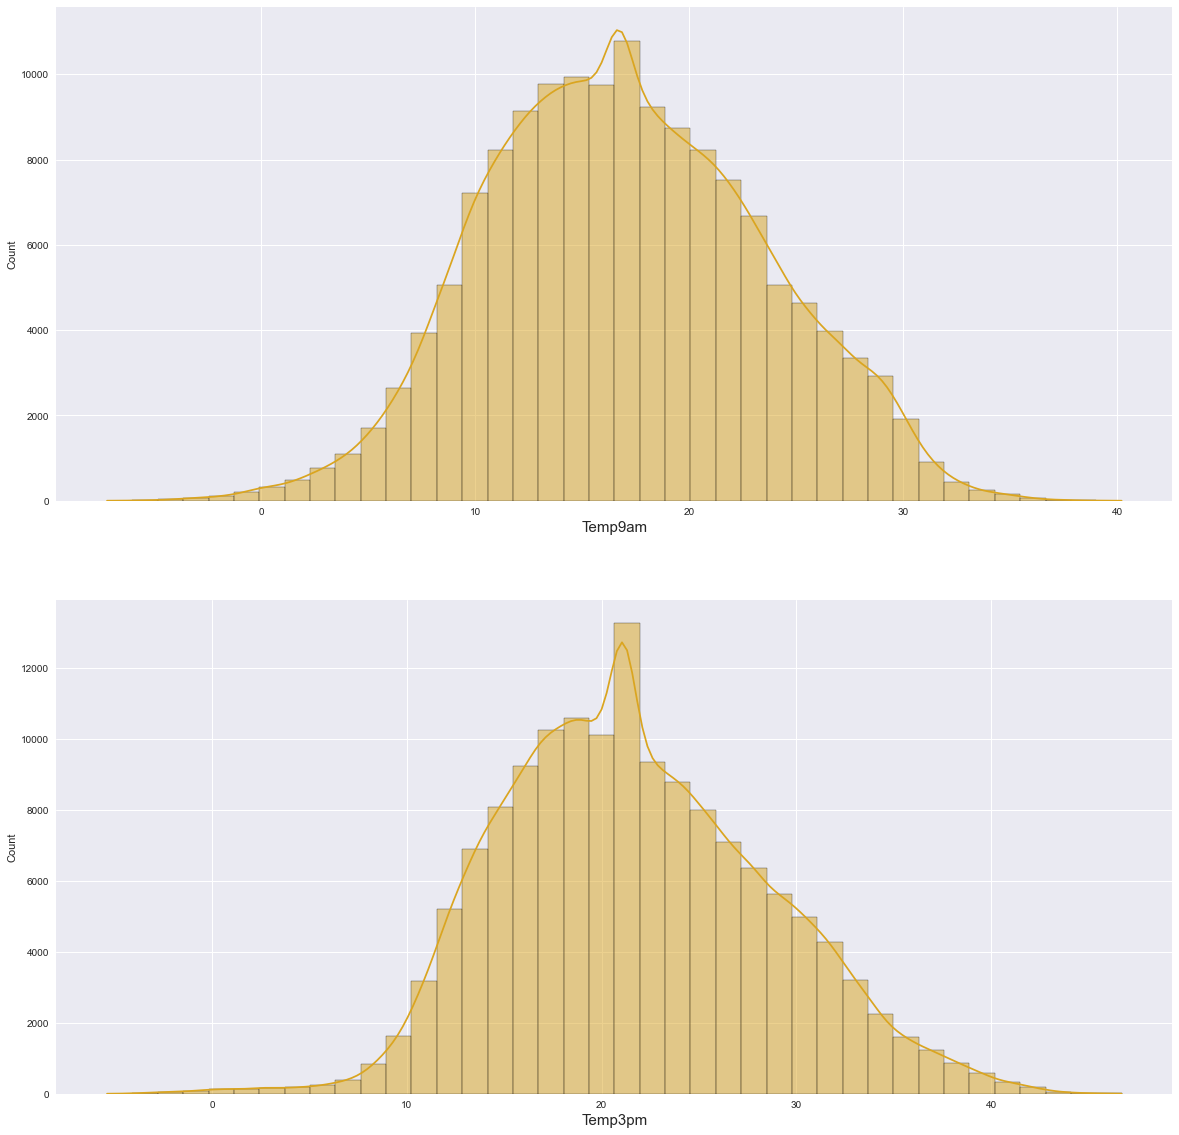

In [25]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(20,20))

sns.histplot(df['Temp9am'], ax=ax[0], color="goldenrod", bins=40, kde=True)
ax[0].set_xlabel("Temp9am",fontsize=15)

sns.histplot(df['Temp3pm'], ax=ax[1], color="goldenrod", bins=40, kde=True)
ax[1].set_xlabel("Temp3pm",fontsize=15);

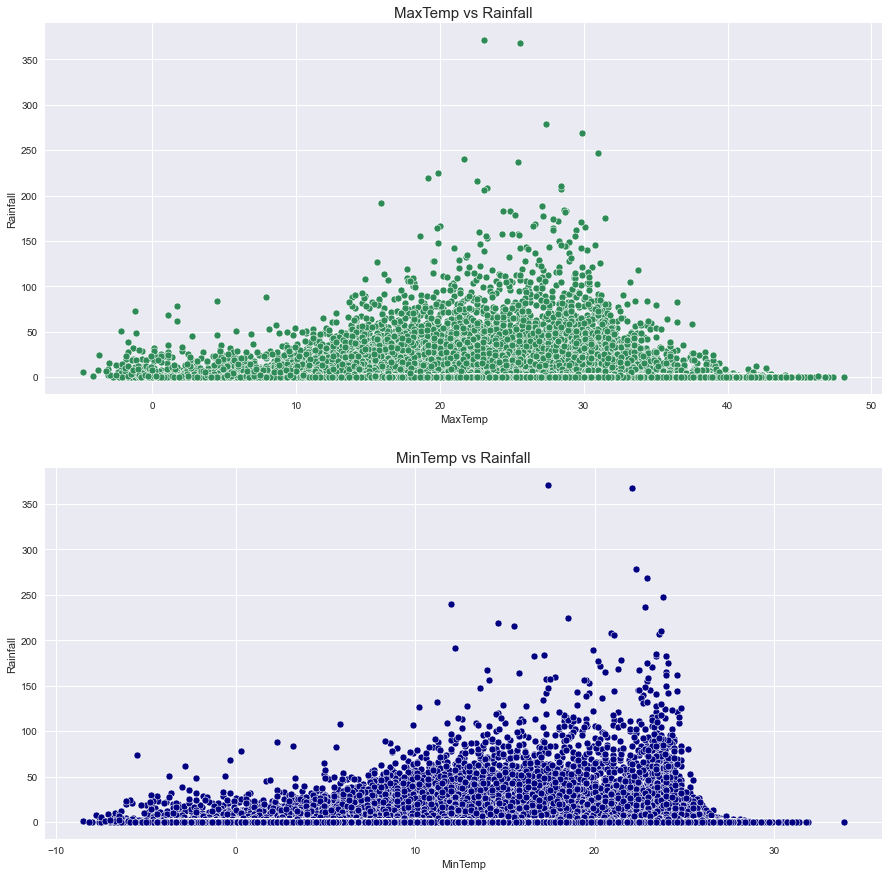

In [26]:
plt.style.use("seaborn")
fig, ax =plt.subplots(2,1, figsize=(15,15)) 


sns.scatterplot(x = data['MaxTemp'], y = data['Rainfall'], ax=ax[0], color="seagreen");
ax[0].set_title("MaxTemp vs Rainfall",fontsize=15);

sns.scatterplot(x = data['MinTemp'], y = data['Rainfall'], ax=ax[1], color="navy");
ax[1].set_title("MinTemp vs Rainfall",fontsize=15);

Text(0.5, 1.0, 'Temperature at 3PM')

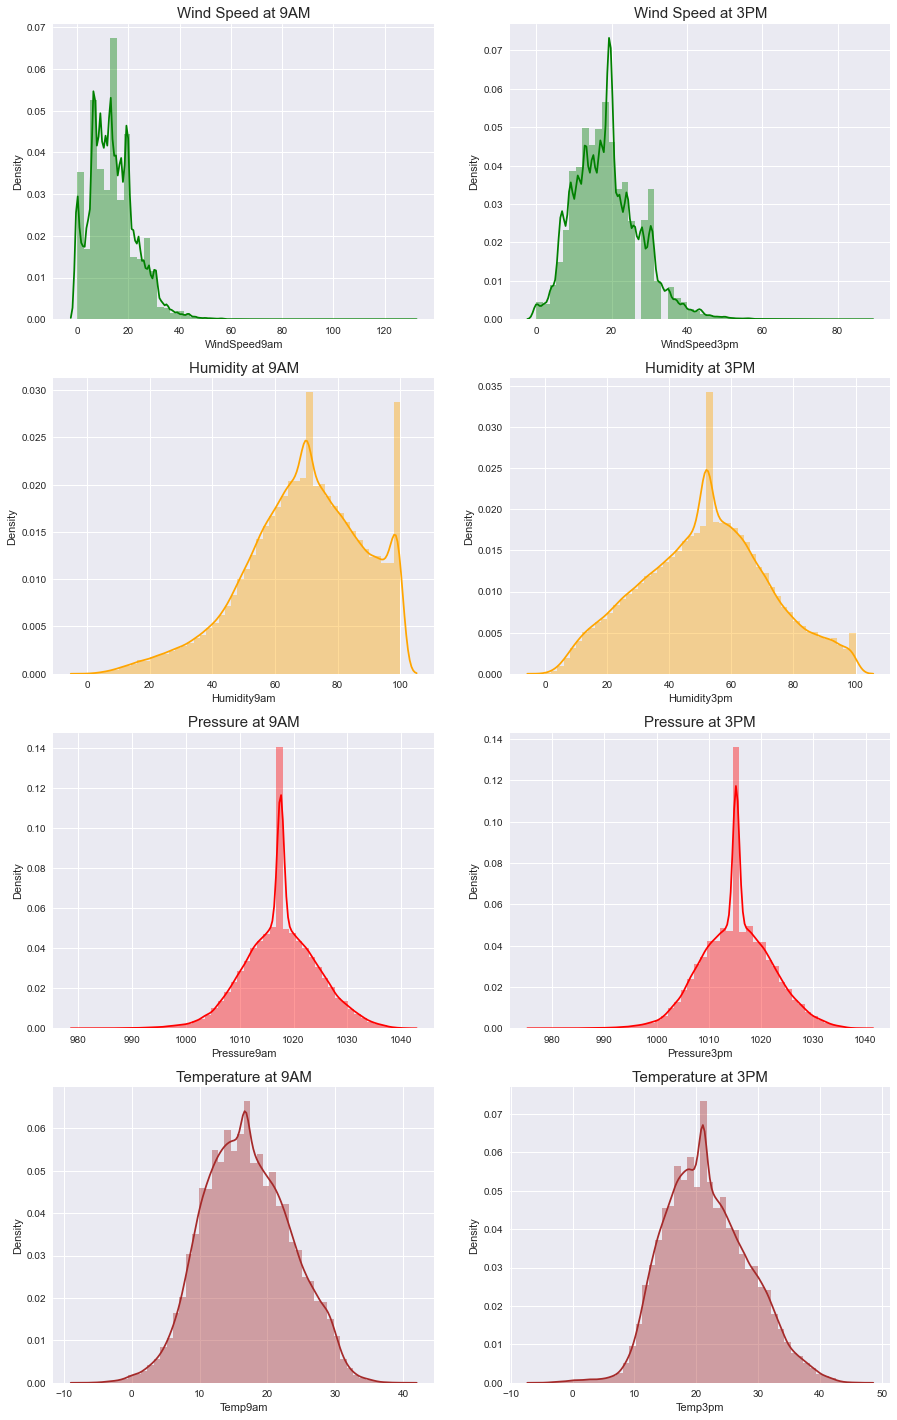

In [27]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))

# WindSpeed9am
sns.distplot(df['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Wind Speed at 9AM", fontsize=15)

# WindSpeed3pm
sns.distplot(df['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Wind Speed at 3PM", fontsize=15)

# Humidity9am
sns.distplot(df['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.distplot(df['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.distplot(df['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.distplot(df['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title("Pressure at 3PM", fontsize=15)

# Temp9am
sns.distplot(df['Temp9am'], ax=ax[3,0], color='brown')
ax[3,0].set_title("Temperature at 9AM", fontsize=15)

# Temp3pm
sns.distplot(df['Temp3pm'], ax=ax[3,1], color='brown')
ax[3,1].set_title("Temperature at 3PM", fontsize=15)

In [28]:
df.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir               int64
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday               float64
RainTomorrow            float64
dtype: object

In [29]:
# Drop date column
df.drop("Date", axis=1, inplace=True)

In [30]:
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

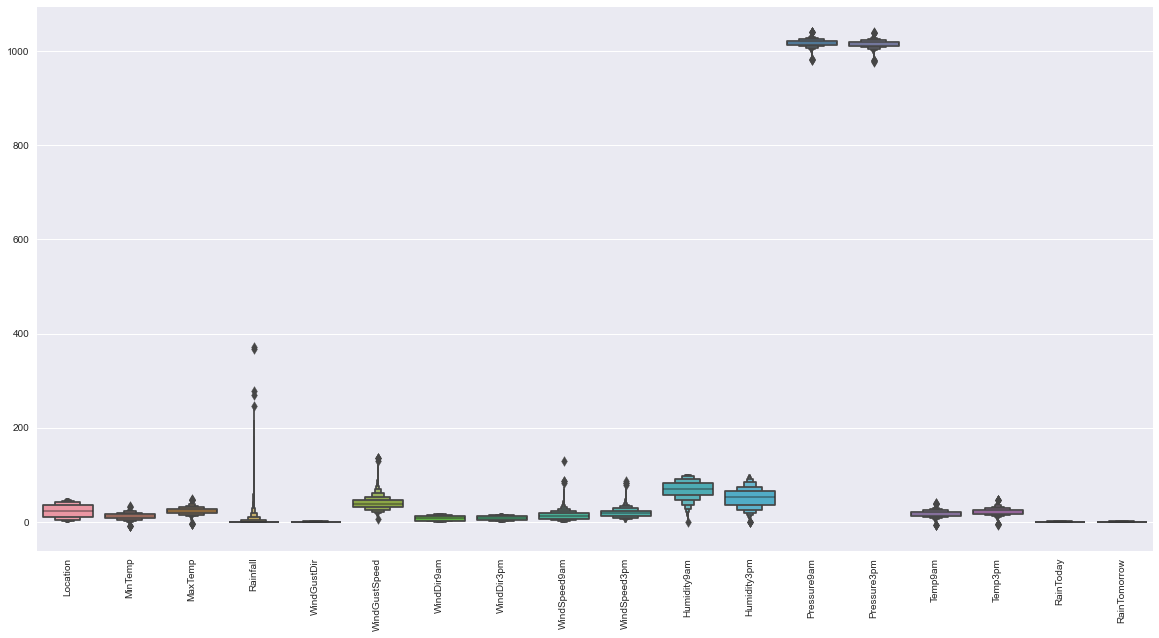

In [31]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = data)
plt.xticks(rotation=90)
plt.show()

## 6. Splitting the data into training and test datasets 

Here, we are trying to predict whether it is going to Rain tomorrow or not in Australia using the given data. Hence, the RainTomorrow will be the y label and rest of the data will be the X or the input data.

In [32]:
# X data
X = df.drop("RainTomorrow", axis=1)

In [33]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,0,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,2,7.4,25.1,0.0,0,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,2,12.9,25.7,0.0,0,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,2,9.2,28.0,0.0,0,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,2,17.5,32.3,1.0,0,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0


In [34]:
# y data
y = df["RainTomorrow"]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: RainTomorrow, dtype: float64

In [35]:
# Splitting the data into X train, X test and y train, y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
len(X_train), len(X_test)

(116368, 29092)

In [37]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

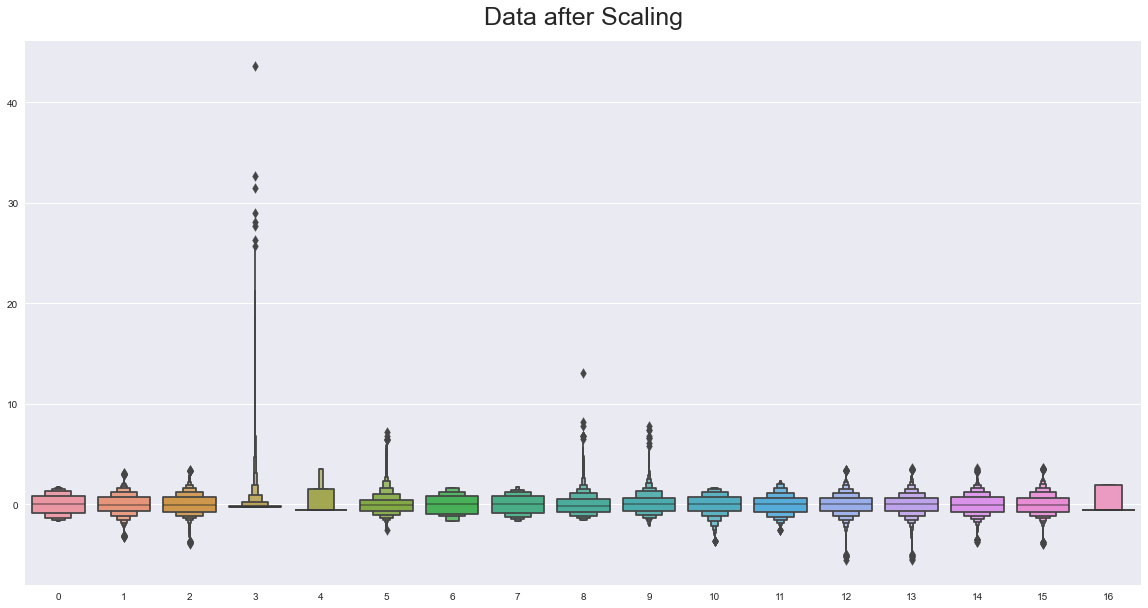

In [38]:
plt.figure(figsize=(20,10))
plt.title("Data after Scaling", fontsize=25, y=1.02)
sns.boxenplot(data = X_train)
plt.show()

## 7. TRAINING MODEL

###  Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
LogisticRegressionScore = lr.score(X_test,y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 83.93716485631789


In [42]:
from sklearn import metrics
y_pred_lr = lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22672
         1.0       0.71      0.45      0.55      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



### Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [44]:
RandomForestClassifierScore = rf.score(X_test,y_test)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier model: 85.02681149456896


In [45]:
y_pred_rf = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     22672
         1.0       0.75      0.48      0.59      6420

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



### KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [47]:
KNeighborsClassifierScore = knn.score(X_test,y_test)
print("Accuracy obtained by KNeighbors Classifier model:", KNeighborsClassifierScore*100)

Accuracy obtained by KNeighbors Classifier model: 83.10875842155919


In [48]:
y_pred_knn = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90     22672
         1.0       0.73      0.37      0.49      6420

    accuracy                           0.83     29092
   macro avg       0.79      0.67      0.70     29092
weighted avg       0.82      0.83      0.81     29092



### Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [50]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 84.50433108758422


In [51]:
y_pred_gb = gb.predict(X_test)
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     22672
         1.0       0.73      0.47      0.57      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.83      0.85      0.83     29092



### Stochastic Gradient Boosting 

In [52]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, subsample=0.9)

In [53]:
StochasticGradientBoostingScore = sgb.score(X_test,y_test)
print("Accuracy obtained by Stochastic Gradient Boosting model:", StochasticGradientBoostingScore*100)

Accuracy obtained by Stochastic Gradient Boosting model: 84.37371098583803


In [54]:
y_pred_sgb = sgb.predict(X_test)
print(metrics.classification_report(y_test, y_pred_sgb))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     22672
         1.0       0.73      0.46      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



## 8. Comparing performance of  the models

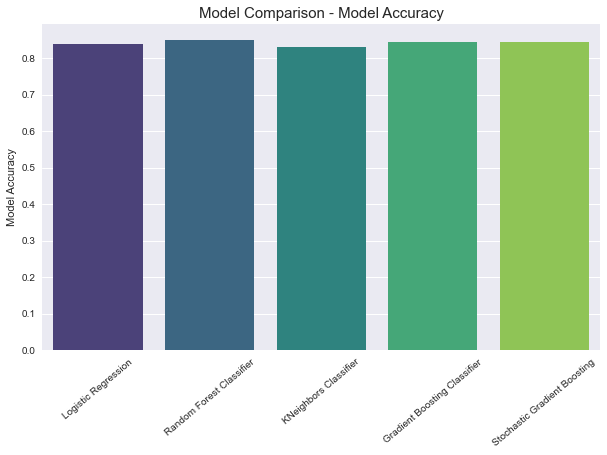

In [55]:
x = ["Logistic Regression", "Random Forest Classifier",
     "KNeighbors Classifier",
     "Gradient Boosting Classifier", 
     "Stochastic Gradient Boosting"]

y = [LogisticRegressionScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     GradientBoostingClassifierScore, 
     StochasticGradientBoostingScore]

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x,y=y, palette="viridis");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=15);

After Comparing performance of different models, we can say that predicting next-day rain is more effificient when we are applying Random Forest Classifier with Accuracy of : 85.02 % . 